# Introduction

## Goal
The goal of this lab is to familiarize yourself with the most important techniques for neuro-evolution. You will first explore the basic neuro-evolution techniques and then move on to more advanced algorithms such as Neural Evolution of Augmenting Topologies (NEAT).

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous labs. If you did not participate in the previous labs, you may want to look that over first and then start this lab's exercises. Furthermore, in this lab we will use another Python library, *neat-python*, that contains a complete implementation of **NEAT** ([link here](https://neat-python.readthedocs.io)).


Note that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the training error function of the evolved Neural Networks, i.e., lower values correspond to a better fitness!

In [ ]:
#installing NEAT library
!pip3 install neat-python #pip
!pip3 install graphviz

## Exercise 1
In the first two exercises you will investigate running an EA to evolve the weights of an Artificial Neural Network (ANN). While there are other ways to learn the weights of an ANN (gradient based methods, such as backpropagation and alike), using evolution is an effective means in many circumstances. In this first exercise we will evolve the weights of a simple Feed Forward Neural Network (FFNN), while in the next one we will evolve the weights of more complex, recurrent neural nets. In both cases, we will assume a fixed topology with one input layer with as many nodes as the inputs, one output layer with a single node, and one (optional) hidden layer with a predefined number of nodes. Weights range in $[-8,8]$ (with real-valued encoding). All nodes of these Neural Networks use the logistic activation function (sigmoid):
$f(x) = \frac{1}{1+e^{-x}}$.

We begin by evolving the weights of a minimal Neural Network to solve the ``Or`` problem. That means we will use a Neural Network that has two inputs, and one output, which should produce the logical ``Or`` function of the two input values, see the truth table shown in table below.

| **Input 1** | **Input 2** | **Output** |
|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0          |
| 0           | 1           | 1          |
| 1           | 0           | 1          |
| 1           | 1           | 1          |


Run the code below to evolve the weights for this ``Or`` network. The fitness here is the sum of squared errors between the network's output and the target output across each of the four input patterns. If you see the best fitness approach zero (e.g. go under 0.1) then you have found a network able to solve this problem. This most likely looks similar to what shown in the Figure below. 

![A graphical representation of the evolved Neural Network for the ``Or`` problem"](img/ann_or.png)

Here the Neural Network is depicted with its weights and biases shown by the corresponding color. If you were able to solve the ``Or`` problem, look at the weights of the Neural Network (note that, in the terminal, weights appear ordered by layer and, for each layer, by node, the bias weight being the last one) and think about / compute how it behaves when given different input patterns. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output. It is important to think about this now, because it will be difficult to keep track of what our Neural Networks are doing once we start using more complex topologies.

If you were not able to solve the ``Or`` problem, try modifying some of the EA parameters (see the comments in the script), until you are able to do so.

Once you are able to solve ``Or``, try solving the ``And`` problem instead (change in the script ``problem_class=Or`` to ``problem_class=And``).

- Do the same EA parameters that you used for ``Or`` work for ``And`` as well? If not, modify them until you are able to solve ``And``.


Now that we can solve ``Or`` and ``And``, we will try something a little more challenging. Change the parameter ``problem_class`` to be ``Xor``, so that we are now trying to solve the ``Exclusive Or`` (``Xor``) function, see the truth table shown in the Table below.

| **Input 1** | **Input 2** | **Output**           |
|:-----------:|:-----------:|:--------------------:|
| 0           | 0           | 0                    |
| 0           | 1           | 1                    |
| 1           | 0           | 1                    |
| 1           | 1           |<span style="color:red">0</span>|


This function has one small, but crucial difference from ``Or`` (highlighted in red), as can be seen by comparing their truth tables.

Try running the code again after changing ``problem_class`` to ``Xor``.
- Can you solve it? If you are unable to solve it, why is that?

In this case, it is worth considering an additional parameter that can be tuned, that is the number of hidden nodes of the Neural Network (parameter ``args["num_hidden_units"]``. Try changing this parameter from 0 to 1 (this will add to the topology a hidden layer with one node).

- Does this allow you to solve the problem? What if you change this value to 2 or more?
- How many hidden nodes are required to solve this problem? Can you provide an explanation for why that is the case?

When you find a network that does compute ``Xor``, once again see if you can understand how the network does so. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output.

Best Individual [ 8.         -7.61786487 -8.          8.          3.71259675  4.02565678
 -5.34523316 -5.72372492  8.        ]
Best Fitness 0.02152541723502054


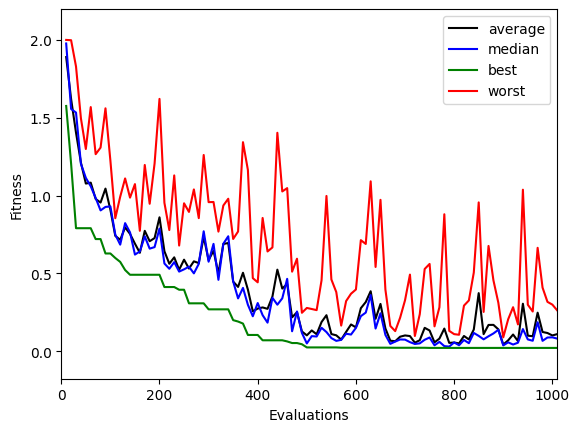

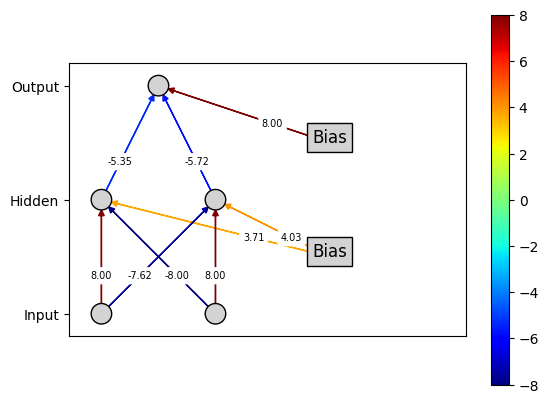

In [13]:
from pylab import *
from random import Random
from utils.utils_08.ga import run_ga
import sys

from utils.utils_08.ann_benchmarks import Or, And, Xor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
#problem_class = Or
#problem_class = And
problem_class = Xor

# parameters for the GA
args["num_hidden_units"] = 2 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random()

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

## Exercise 2
So far we have used Neural Networks for solving tasks where the output depends *statically* on the input vector, i.e., the input-output dependency does not change over time. However, there are many tasks such as time-series forecast and some robotic applications where the input-output dependence is *dynamic*, i.e., the output of the system at time $t$ depends on the inputs at the same step, but also on the inputs at the previous time step(s).
First, we start with a modified version of the ``Or`` problem, that is called ``Temporal Or``. While the basic ``Or`` problem involved evolving a Neural Network that would give a single output when provided two simultaneous inputs, in ``Temporal Or``, there is only a single input node and the input values are provided in sequence. Therefore the network will have to remember the first input when seeing the second, in order to output the correct value.

Run the jupyter block code to solve ``Temporal Or``.
- Can you solve it? If you are unable to solve it, why is that?

In this case, notice that there is one new parameter that you can modify in the script: ``recurrent``. This parameter is a Boolean flag, that says whether the network is recurrent (in this case an Elman network, [link here](https://en.wikipedia.org/wiki/Recurrent\_neural\_network\#Elman\_networks\_and\_Jordan\_networks)) or not (in which case it is a FFNN).
- If you set ``recurrent`` to be ``True``, can you now evolve a successful network?
- Why might recurrence be important for solving a temporal problem such as this?
  
Once you have been able to evolve a network capable of solving ``Temporal Or``, you can change in the script the parameter ``problem_class`` to ``TemporalAnd``, to attempt solving a temporal version of ``And``, and repeat.
- Do the same EA parameters that solved ``Temporal Or`` also work for ``Temporal And``?
- Why, or why not?

Finally, change in the script the parameter ``problem_class`` to ``TemporalXor``, to attempt solving a temporal version of ``Xor``. Run the code again.
- Are you able to find a successful network?
- If not, think back to what you just saw in the previous exercise. What combination of recurrence and no. of hidden nodes is needed to solve ``Temporal Xor`` and why is that?

Best Individual [-8.         -8.          6.98379565  7.15471718  3.31209224  0.69024421
  3.19528559 -4.37190289  7.95514896 -8.         -4.10451508]
Best Fitness 0.0021979008051553014


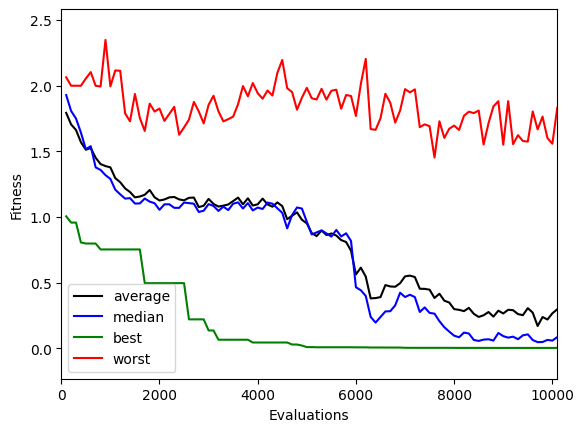

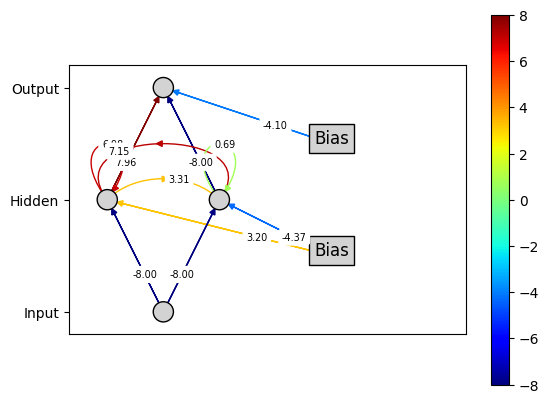

In [31]:
from utils.utils_08.ann_benchmarks import TemporalOr, TemporalAnd, TemporalXor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
#problem_class = TemporalOr
#problem_class = TemporalAnd
problem_class = TemporalXor

# parameters for the GA
args["num_hidden_units"] = 2 # Number of hidden units of the neural network
args["recurrent"] = True # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random()

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                  problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"], args["recurrent"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

## Exercise 3

In this exercise we will use the Python implementation of Neural Evolution of Augmenting Topologies (NEAT) provided by *neat-python*, to solve the ``Xor`` problem we have seen in the first exercise. The main difference is that in this case we won't fix the network topology *a priori* and evolve its weights, but rather we will evolve the weights *and* the network topology itself. 

**NOTE**: In this case NEAT is configured to *maximize* the number of correct outputs in the $4$ input cases of the ``Xor`` truth table, therefore the optimal fitness value is $4$.

See the jupyter block code and try to understand its main steps. The *neat-python* library allows to configure all the algorithmic details of NEAT by means of an external configuration file. In this exercise two different configuration files **(inside folder utils/utils_08)** will be used, namely:
-  ``config-feedforward-2input-xor-noelitism.txt``
-  ``config-feedforward-2input-xor-elitism.txt``

Spend some time on one of the two files to get an idea about the main configurations that can be changed in NEAT ([see link](https://neat-python.readthedocs.io)). As you will see, in this case the two configuration files are pretty much the same, except for two parameters, namely ``species_elitism`` and ``elitism``. These represent respectively the no. of elite species (remember from the lecture that NEAT uses a **speciation** mechanism to allow mating only of *similar* networks) and elite individuals (i.e., networks) that are kept in the population. More specifically,``config-feedforward-2input-xor-noelitism.txt`` sets both parameters to zero, while ``config-feedforward-2input-xor-elitism.txt`` sets them to two, meaning that two elite species and two elite networks are kept.

The script can be configured either to run a single instance of NEAT (by setting ``num_runs=1``) on one of the two configurations, or multiple runs (by setting ``num_runs`` to values bigger than one) on one or both configurations. In the first case, you can choose one of the two configuration files (with/without elitism) and observe how a single run of each configuration performs. The script will log on the console the runtime details of the evolutionary process (to disable this feature, simply comment the line ``p.add_reporter(neat.StdOutReporter(True)``). At the end of the run, you should obtain two figures similar to those shown below. In the second case, the script will execute multiple runs (e.g. $10$) of both configurations, and then produce a boxplot comparing the best fitness obtained by each configuration at the end of the computational budget. By default, the stop condition is set to $100$ generations, see the parameter ``num_generations`` in the code. However, the algorithm has an additional stop criterion, i.e., it stops when it obtains a Neural Network whose fitness is higher than the parameter ``fitness_threshold`` in the corresponding configuration file (in this case, by default this parameter is set to $3.9$, sufficiently close to the optimal value of $4$ to be approximated by a sigmoid function).

Fitness trend for the ``Xor`` problem solved by NEAT |  Corresponding species evolution, where each stacked plot represents one species and its size over evolutionary time. Species can go extinct if their size goes to zero
- | - 
![alt](img/trend.png) | ![alt](img/species.png)

- First, run a single instance of each of the two configurations (with/without elitism, simply change ``config_files[0]`` to ``config_files[1]``). What do you observe? Is the algorithm without elitism able to converge to the optimal fitness value? What about the algorithm with elitism? What is the effect of elitism on convergence? What about the number of species and their dynamics?
- Change the parameter ``num_runs`` to $10$ or more. Does the boxplot confirm -in statistical terms- what you observed on a single run? (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


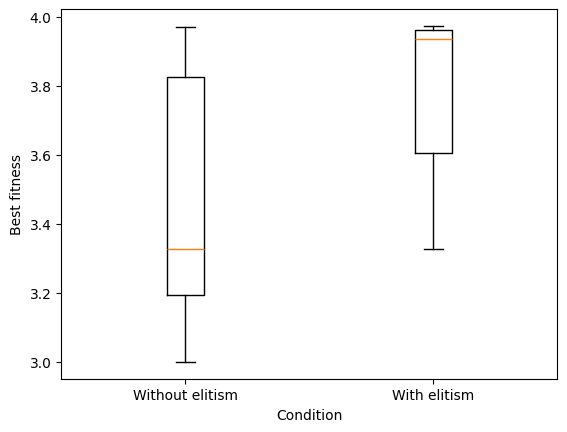

In [5]:
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 100
num_runs = 10

config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:
    # Load configuration.
    config_file = os.path.join(local_dir, config_files[1])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    #visualize.draw_net(config, winner, filename='2-input OR', view=True, node_names=node_names)
else:
    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without elitism', 'With elitism'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

## Exercise 4
In this exercise we use again NEAT, this time to solve a 3-input Boolean function described by the truth table shown in the Table below. This function returns $1$ if and only if only one input is equal to $1$, otherwise it returns $0$.

| **Input 1** | **Input 2** | **Input 3** | **Output** |
|:-----------:|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0           | 0          |
| 0           | 0           | 1           | 1          |
| 0           | 1           | 0           | 1          |
| 0           | 1           | 1           | 0          |
| 1           | 0           | 0           | 1          |
| 1           | 0           | 1           | 0          |
| 1           | 1           | 0           | 0          |
| 1           | 1           | 1           | 0          |


This script has the same structure that we have seen in the previous exercise. In this exercise two different configuration files will be used, namely:
- ``config-feedforward-3input-function-nohidden.txt``
- ``config-feedforward-3input-function-hidden.txt``

In this case the only difference between the two configurations (which both use elitism) is the number of hidden nodes to add to each genome in the initial population (parameter ``num_hidden``), which is set respectively to $0$ and $3$ (also, note that the parameter ``num_inputs`` is set to $3$ to allow the use of $3$ inputs, while in the previous exercise it was set to $2$). Note that as in this case the optimal fitness value is $8$ (i.e., the Neural Network output is correct in all 8 input cases), in both configuration files the parameter ``fitness_threshold`` is set to $7.9$.

- What do you observe in this case when you execute a single run of each configuration? What is the effect of using hidden nodes in the initial population?
- What happens when you configure the script to execute multiple runs? Does the boxplot confirm -in statistical terms- what you observed on a single run? (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

In [ ]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 100
num_runs = 1 #2

config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:

    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    #visualize.draw_net(config, winner, filename='3-input Bool function', view=True, node_names=node_names)
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

else:

    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- What is the genotype and what is the phenotype in the problems considered in this lab?
- Why are hidden nodes sometimes needed for a Neural Network to solve a given task? What is the defining feature of problems that networks without hidden nodes are unable to solve?
- Why are recurrent connections needed to solve certain problems? What is the defining feature of problems that networks without recurrent connections are unable to solve? Are there problems that require recurrent connections and multiple hidden nodes?